In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [87]:
train=pd.read_csv("train_regression.csv")

In [88]:
train.head()

id  allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
0   0               100.0       0.841611                  10.0            4.8   
1   1               100.0       7.558488                  10.0            4.8   
2   2                76.0       8.885992                  15.6            5.6   
3   3               100.0       8.795296                  10.0            4.8   
4   4               116.0       9.577996                  11.6            4.8   

   atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0             20.612526           11.08810               2.766   
1             20.298893           12.04083               2.755   
2             33.739258           12.08630               2.828   
3             20.213349           10.94850               2.648   
4             24.988133           11.82448               2.766   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                  1.732                  0.860         0.496070   
1                  1.631                  0.910         0.492719   
2                  1.788                  0.864         0.481478   
3                  1.626                  0.936         0.489272   
4                  1.682                  0.896         0.492736   

   density_Average  Hardness  
0          0.91457       6.0  
1          0.71760       6.5  
2          1.50633       2.5  
3          0.78937       6.0  
4          1.86481       6.0

In [89]:
train.shape

(10407, 13)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [92]:
train.describe()

id  allelectrons_Total  density_Total  allelectrons_Average  \
count  10407.00000        10407.000000   10407.000000          10407.000000   
mean    5203.00000          128.053516      14.491342             17.033222   
std     3004.38646          224.123776      15.972877             10.468734   
min        0.00000            0.000000       0.000000              0.000000   
25%     2601.50000           68.000000       7.558488             10.000000   
50%     5203.00000          100.000000      10.650000             12.600000   
75%     7804.50000          131.000000      16.676996             22.000000   
max    10406.00000        15300.000000     643.093804             67.000000   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
count   10407.000000          10407.000000       10407.000000   
mean        4.546789             37.507703          10.938308   
std         0.690864             26.012313           1.408276   
min         0.000000              0.000000           0.000000   
25%         4.000000             20.298893          10.590660   
50%         4.714286             26.203827          11.202760   
75%         4.800000             48.719500          11.670725   
max         6.000000            167.400000          15.245810   

       el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
count        10407.000000           10407.000000           10407.000000   
mean             2.607662               1.731330               0.944132   
std              0.334906               0.192481               0.180017   
min              0.000000               0.000000               0.000000   
25%              2.530000               1.672500               0.864000   
50%              2.706000               1.732727               0.915556   
75%              2.805000               1.800000               0.981667   
max              3.443000               2.250000               1.615840   

       zaratio_Average  density_Average      Hardness  
count     10407.000000     10407.000000  10407.000000  
mean          0.493349         2.132984      4.647126  
std           0.063080         1.936656      1.680525  
min           0.000000         0.000000      1.000000  
25%           0.476196         0.814800      3.000000  
50%           0.488550         1.351550      5.500000  
75%           0.496070         2.741550      6.000000  
max           0.825990        10.970000     10.000000

In [93]:
y=train.iloc[:,-1]
X=train.iloc[:,:-1]

In [94]:
X.head()

id  allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
0   0               100.0       0.841611                  10.0            4.8   
1   1               100.0       7.558488                  10.0            4.8   
2   2                76.0       8.885992                  15.6            5.6   
3   3               100.0       8.795296                  10.0            4.8   
4   4               116.0       9.577996                  11.6            4.8   

   atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0             20.612526           11.08810               2.766   
1             20.298893           12.04083               2.755   
2             33.739258           12.08630               2.828   
3             20.213349           10.94850               2.648   
4             24.988133           11.82448               2.766   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                  1.732                  0.860         0.496070   
1                  1.631                  0.910         0.492719   
2                  1.788                  0.864         0.481478   
3                  1.626                  0.936         0.489272   
4                  1.682                  0.896         0.492736   

   density_Average  
0          0.91457  
1          0.71760  
2          1.50633  
3          0.78937  
4          1.86481

In [21]:
y.head()

0    6.0
1    6.5
2    2.5
3    6.0
4    6.0
Name: Hardness, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linear=LinearRegression()

In [25]:
linear.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=linear.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAS",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAS 1.1578495294966733
MSE 2.08310081163147
R2 score 0.23387575635556368


Lasso & Ridge

In [28]:
from sklearn.linear_model import Ridge,LassoCV

In [29]:
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=linear.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAS",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAS 1.1578495294966733
MSE 2.08310081163147
R2 score 0.23387575635556368


In [30]:
lasso=LassoCV()
lasso.fit(X_train,y_train)
y_pred=linear.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAS",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAS 1.1578495294966733
MSE 2.08310081163147
R2 score 0.23387575635556368


Data Transformation to increase the accuracy

In [95]:
train.drop('id',inplace=True,axis=1)

In [96]:
train.head()

allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
0               100.0       0.841611                  10.0            4.8   
1               100.0       7.558488                  10.0            4.8   
2                76.0       8.885992                  15.6            5.6   
3               100.0       8.795296                  10.0            4.8   
4               116.0       9.577996                  11.6            4.8   

   atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0             20.612526           11.08810               2.766   
1             20.298893           12.04083               2.755   
2             33.739258           12.08630               2.828   
3             20.213349           10.94850               2.648   
4             24.988133           11.82448               2.766   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                  1.732                  0.860         0.496070   
1                  1.631                  0.910         0.492719   
2                  1.788                  0.864         0.481478   
3                  1.626                  0.936         0.489272   
4                  1.682                  0.896         0.492736   

   density_Average  Hardness  
0          0.91457       6.0  
1          0.71760       6.5  
2          1.50633       2.5  
3          0.78937       6.0  
4          1.86481       6.0

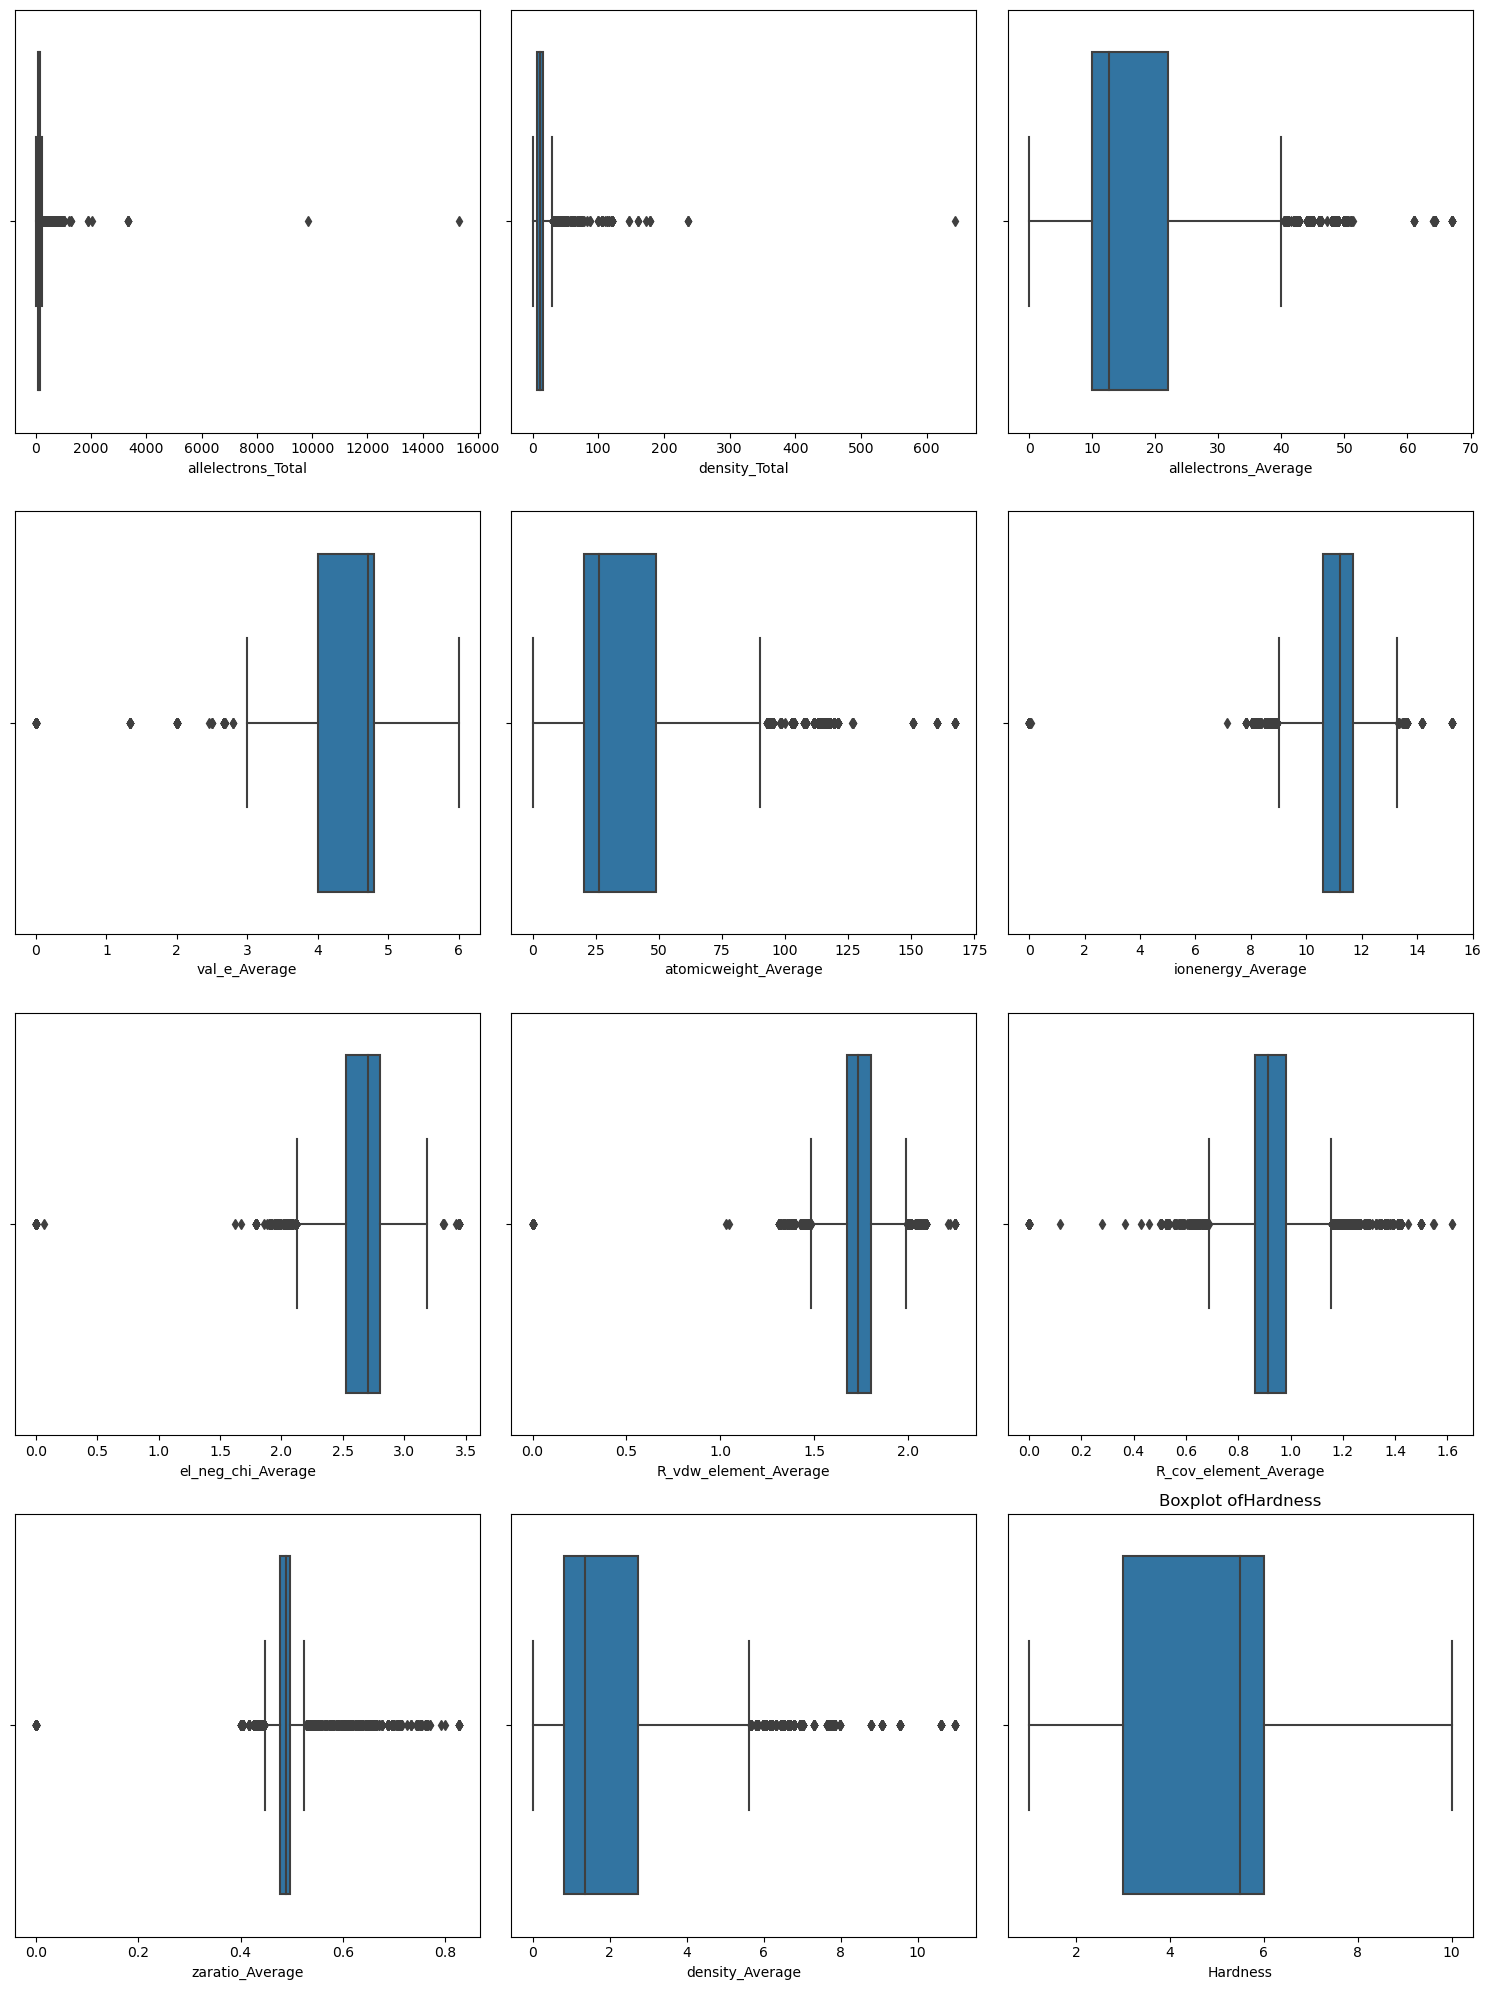

In [97]:
selected_column=train.columns

fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(15,20))
axes=axes.flatten()

for i , column in enumerate(selected_column):
    sns.boxplot(x=train[column],ax=axes[i])
    plt.title(f"Boxplot of{column}")
plt.tight_layout()

In [98]:
Q1 = train["allelectrons_Total"].quantile(0.25) ## Removing Outliers
Q3 = train["allelectrons_Total"].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
train["allelectrons_Total"] = np.clip(train["allelectrons_Total"], lower_limit,upper_limit)

Q1 = train["R_cov_element_Average"].quantile(0.25)
Q3 = train["R_cov_element_Average"].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
train["R_cov_element_Average"] = np.clip(train["R_cov_element_Average"],  lower_limit,upper_limit)

Q1 = train["density_Average"].quantile(0.25)
Q3 = train["density_Average"].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
train["density_Average"] = np.clip(train["density_Average"],  lower_limit,upper_limit)

Q1 = train["zaratio_Average"].quantile(0.25)
Q3 = train["zaratio_Average"].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
train["zaratio_Average"] = np.clip(train["zaratio_Average"],  lower_limit,upper_limit)


Q1 = train["R_vdw_element_Average"].quantile(0.25)
Q3 = train["R_vdw_element_Average"].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
train["R_vdw_element_Average"] = np.clip(train["R_vdw_element_Average"], lower_limit,upper_limit)


Q1 = train["el_neg_chi_Average"].quantile(0.25)
Q3 = train["el_neg_chi_Average"].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
train["el_neg_chi_Average"] = np.clip(train["el_neg_chi_Average"],  lower_limit,upper_limit)


Q1 = train["ionenergy_Average"].quantile(0.25)
Q3 = train["ionenergy_Average"].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
train["ionenergy_Average"] = np.clip(train["ionenergy_Average"],  lower_limit,upper_limit)


Q1 = train["allelectrons_Average"].quantile(0.25)
Q3 = train["allelectrons_Average"].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
train["allelectrons_Average"] = np.clip(train["allelectrons_Average"], lower_limit,upper_limit)


Q1 = train["density_Total"].quantile(0.25)
Q3 = train["density_Total"].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
train["density_Total"] = np.clip(train["density_Total"],  lower_limit,upper_limit)


Q1 = train["val_e_Average"].quantile(0.25)
Q3 = train["val_e_Average"].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
train["val_e_Average"] = np.clip(train["val_e_Average"],  lower_limit,upper_limit)   

Q1 = train["atomicweight_Average"].quantile(0.25)
Q3 = train["atomicweight_Average"].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
train["atomicweight_Average"] = np.clip(train["atomicweight_Average"],  lower_limit,upper_limit)   


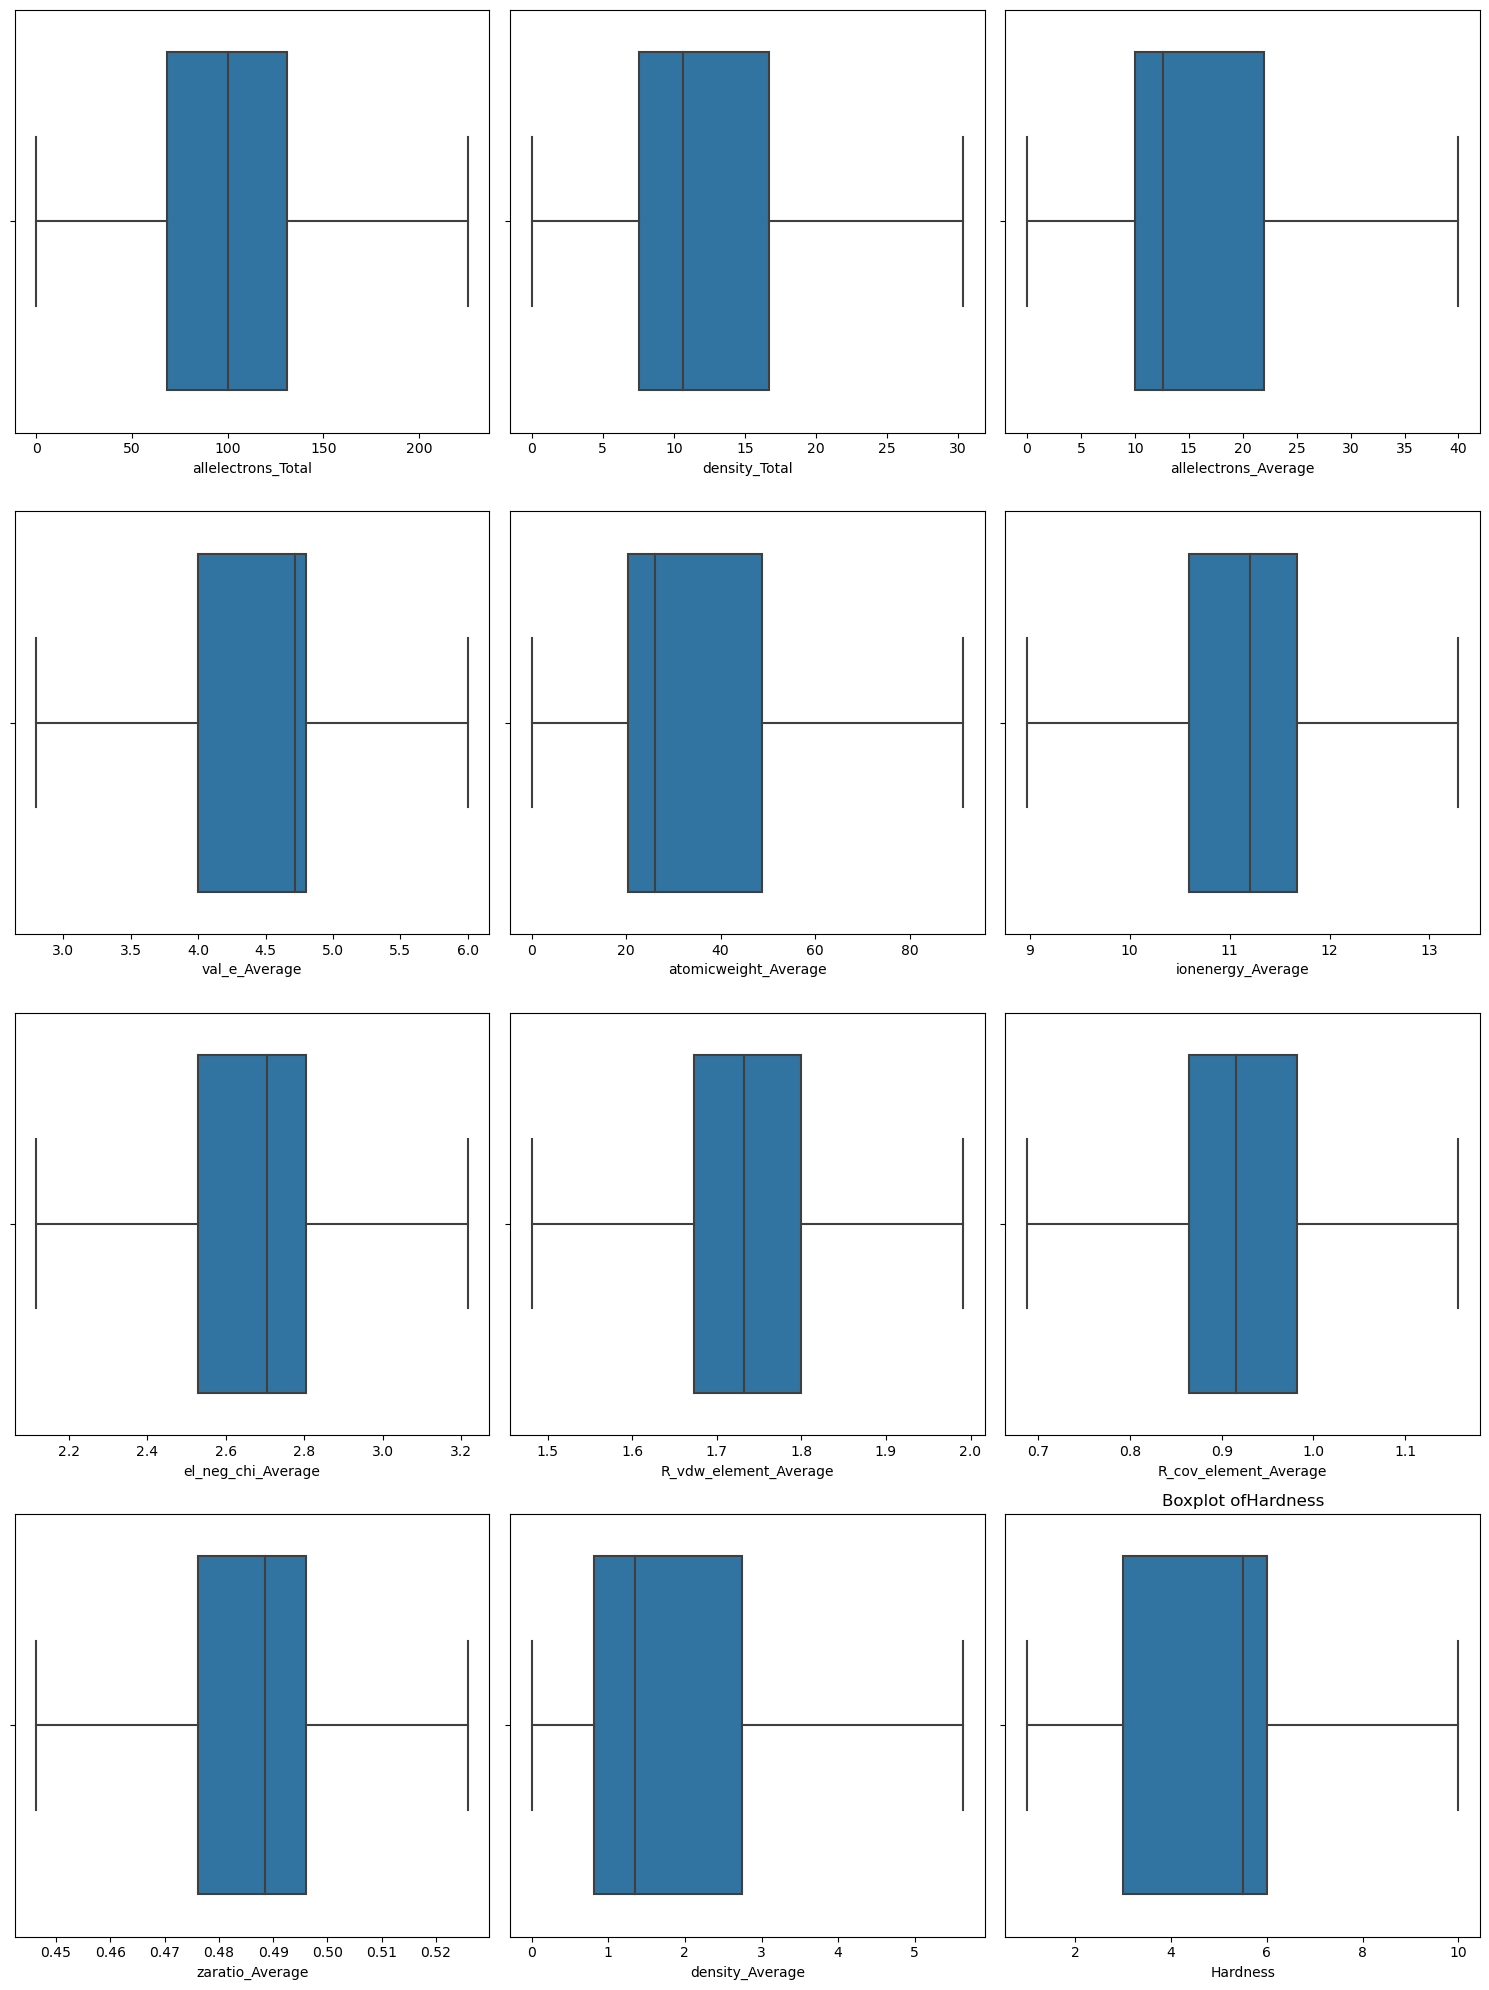

In [36]:
selected_column=train.columns

fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(15,20))
axes=axes.flatten()

for i , column in enumerate(selected_column):
    sns.boxplot(x=train[column],ax=axes[i])
    plt.title(f"Boxplot of{column}")
plt.tight_layout()


<AxesSubplot:>

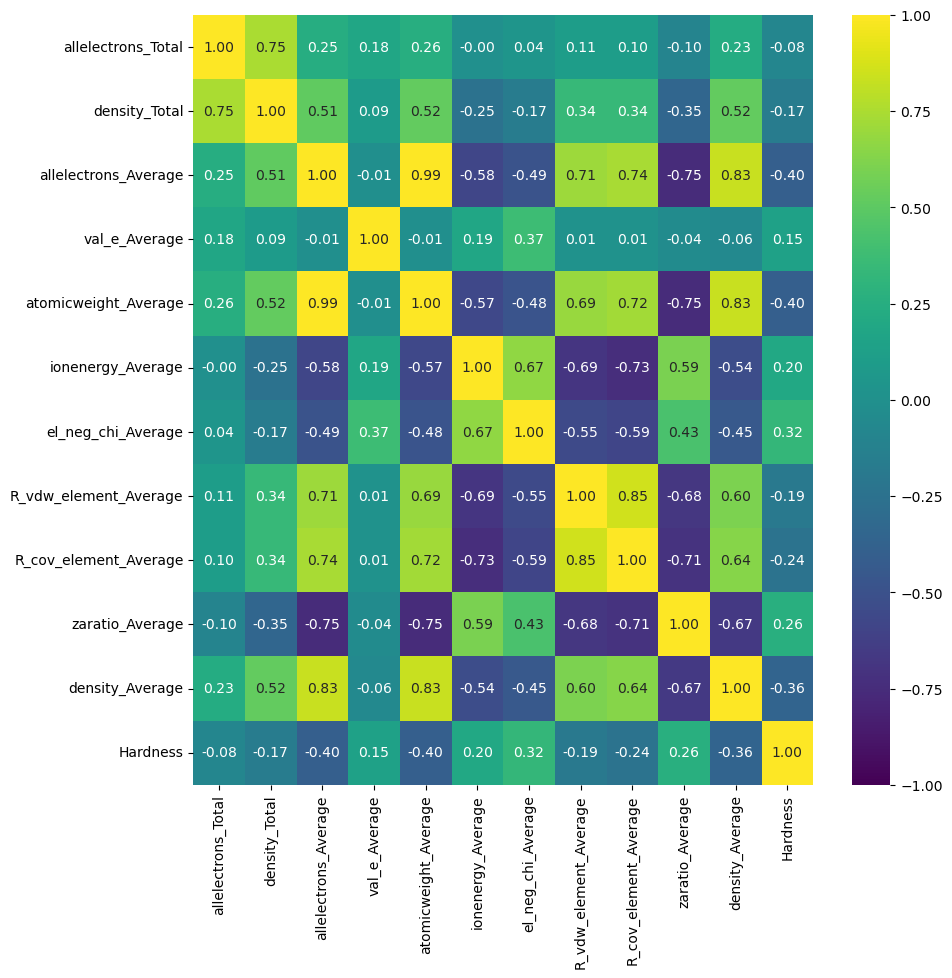

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,vmin=-1, vmax=1, fmt='.2f', cmap='viridis', center=0)

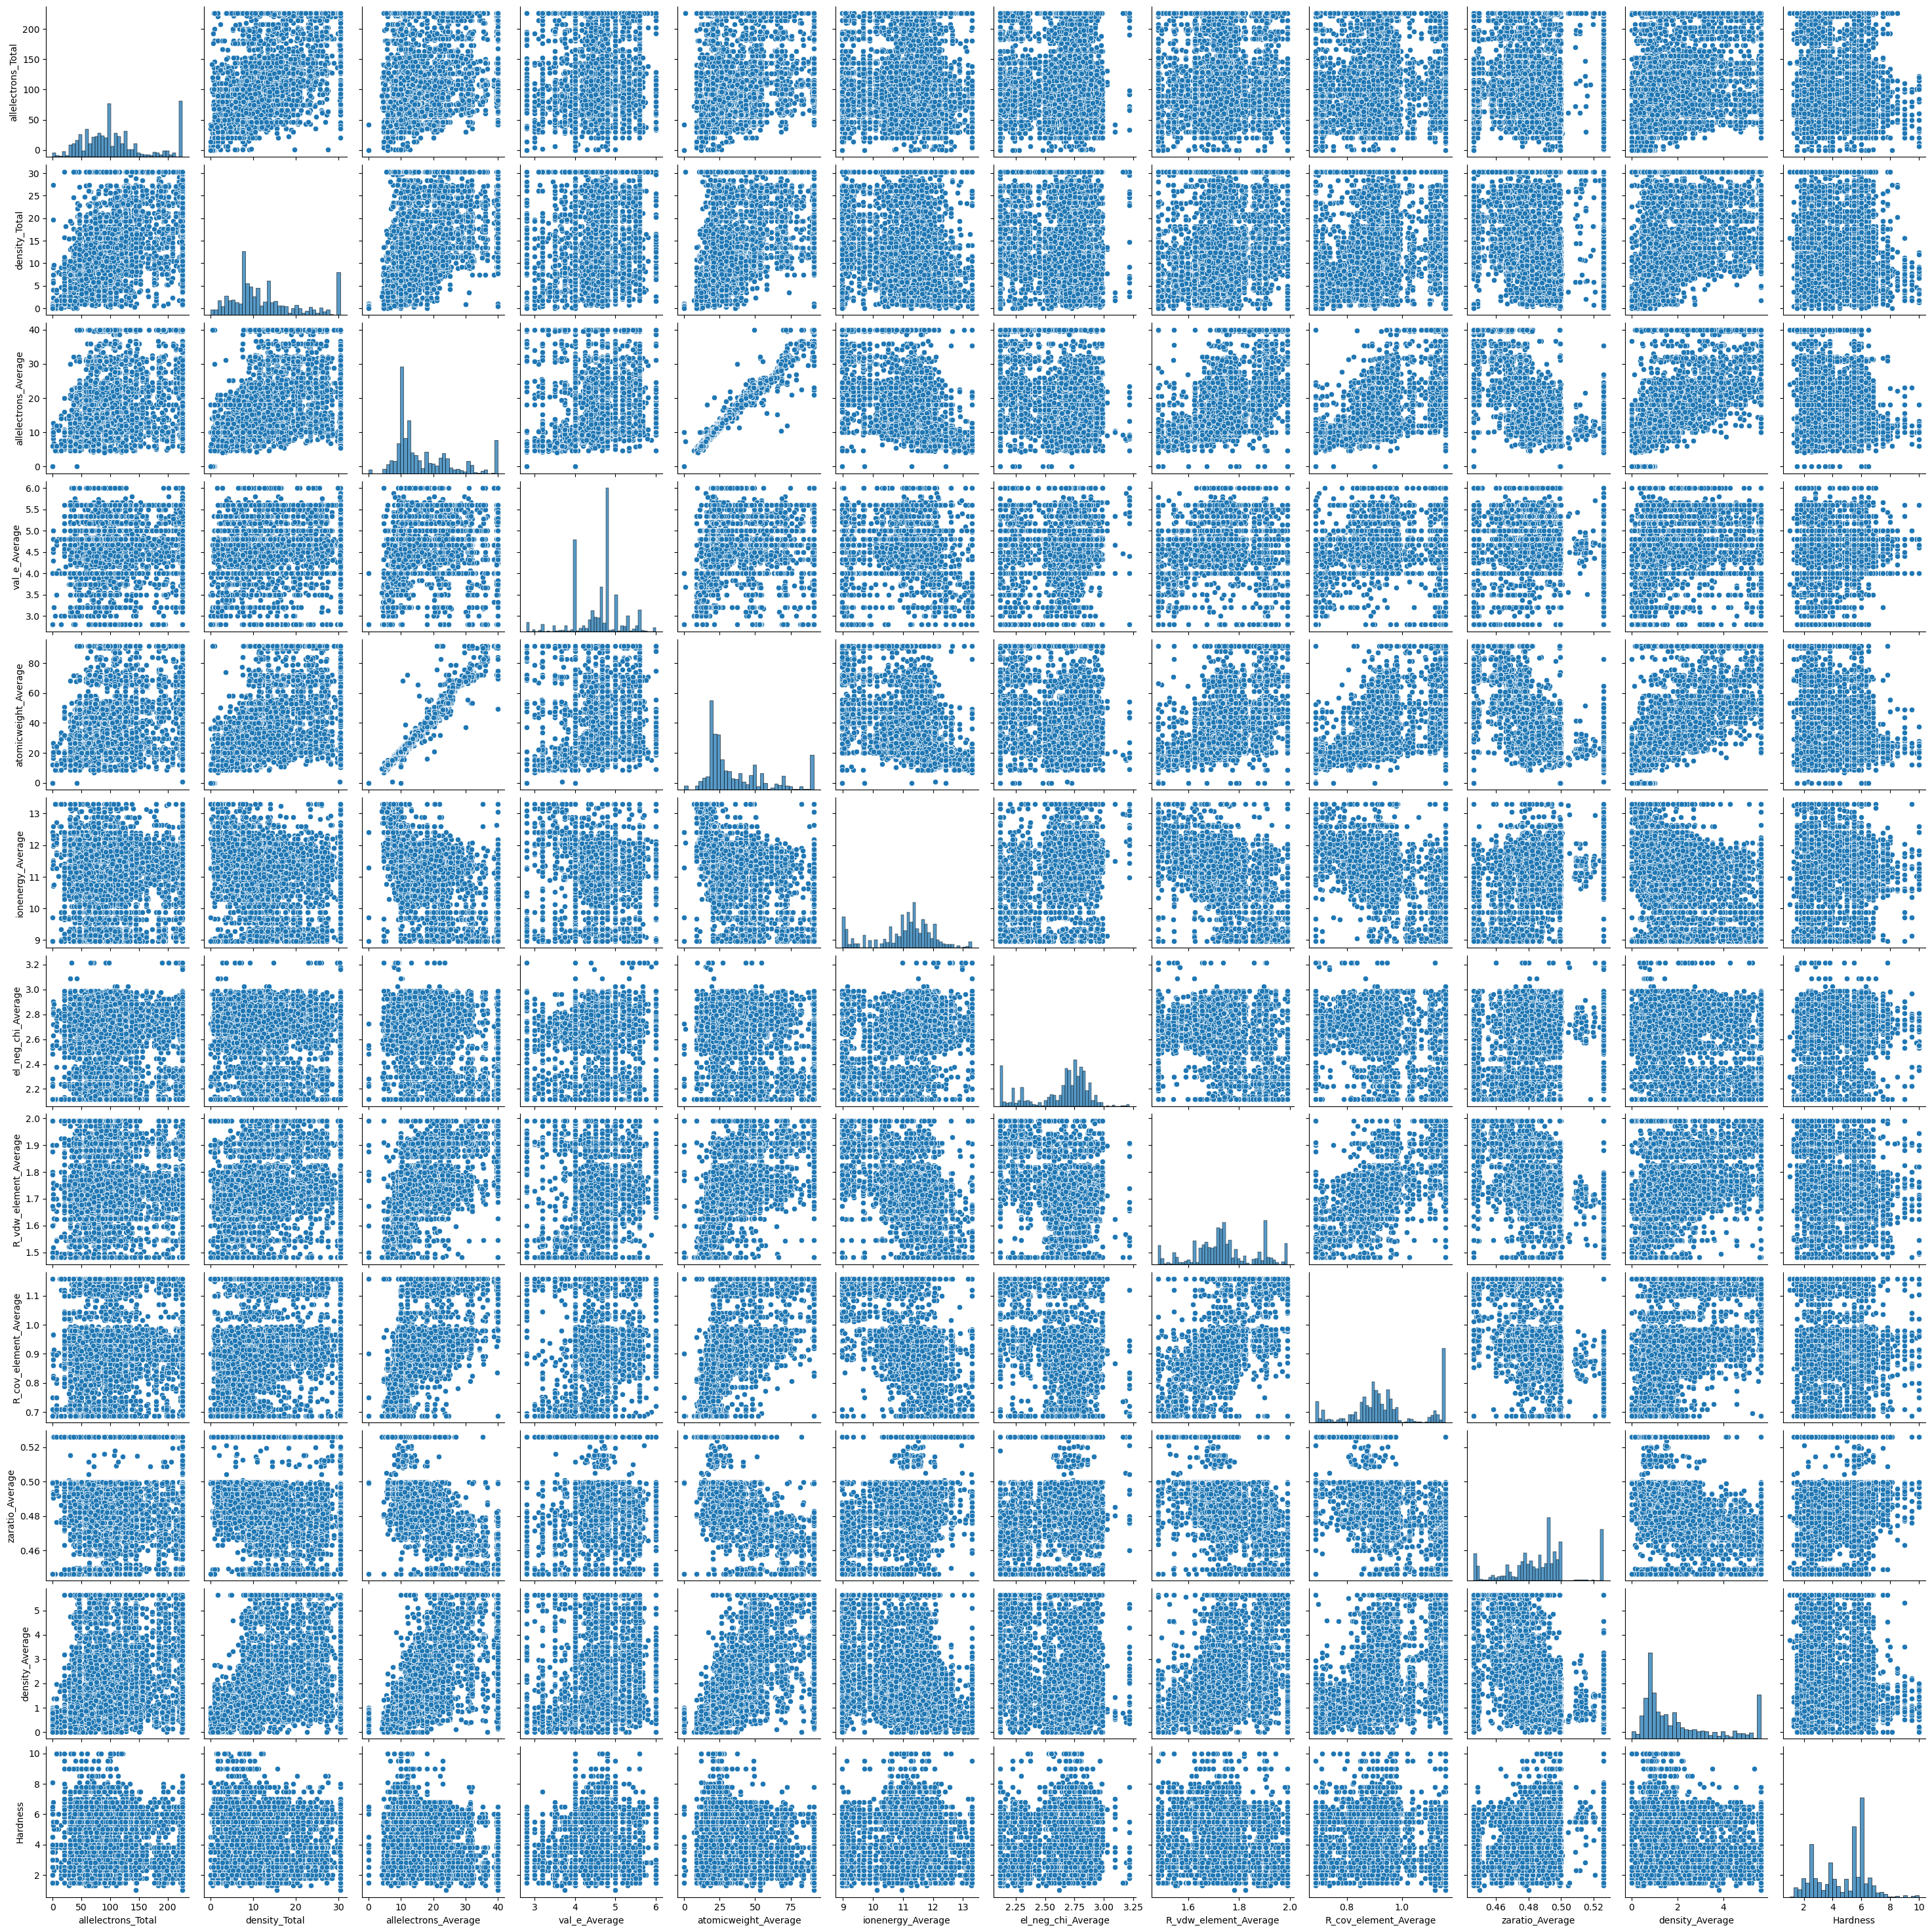

In [103]:
sns.pairplot(train)

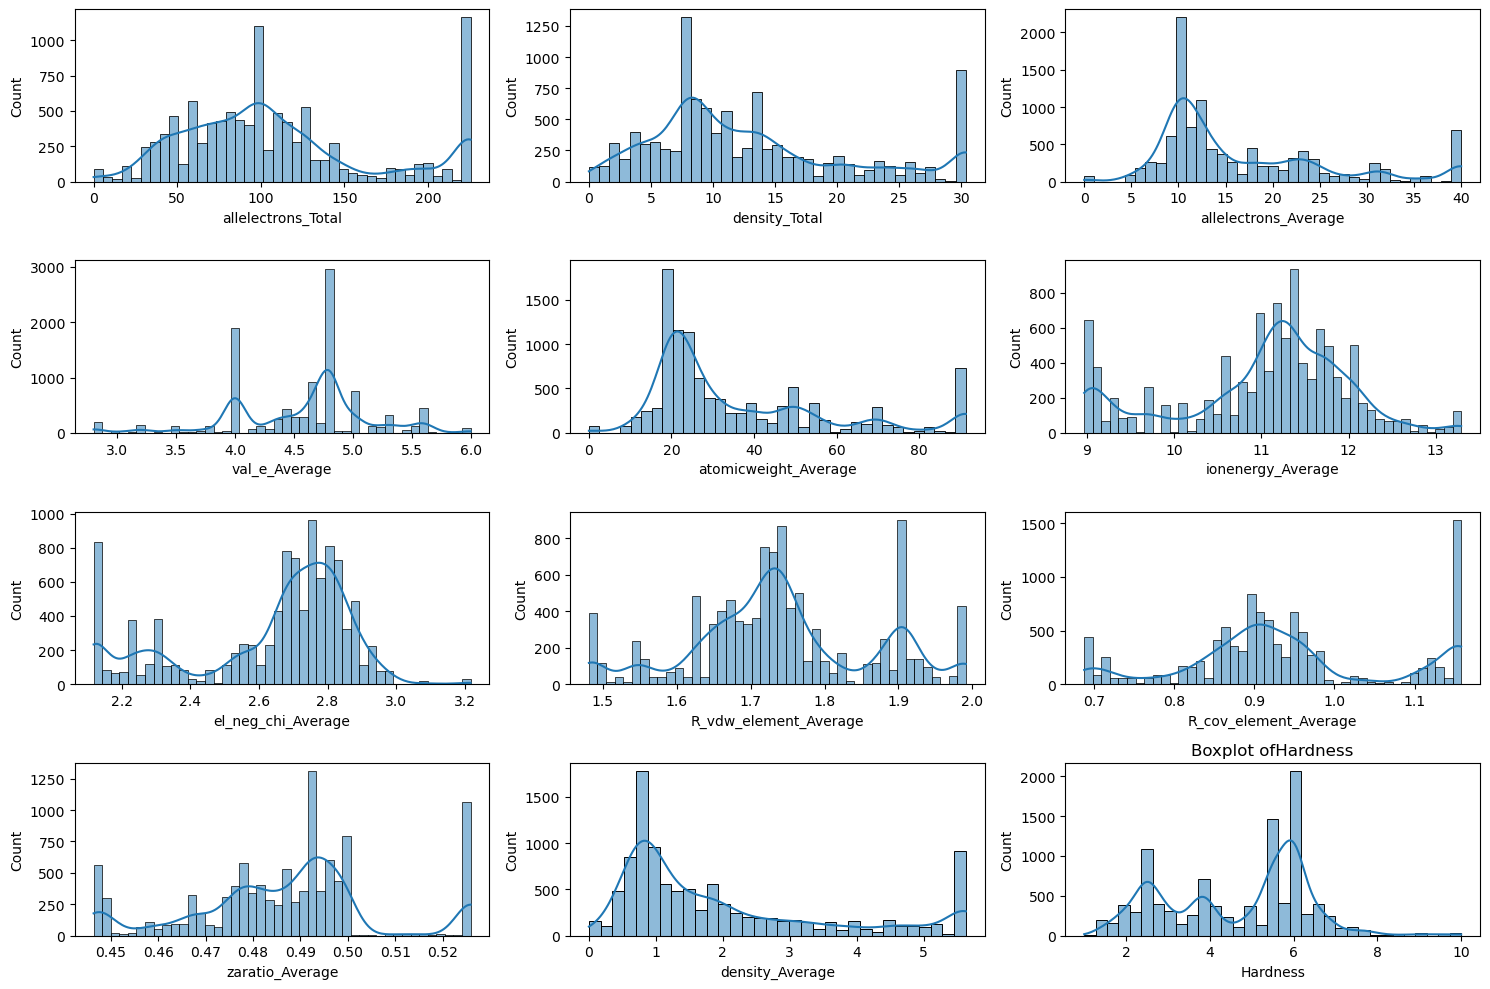

In [104]:
selected_column=train.columns

fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(15,10))
axes=axes.flatten()

for i , column in enumerate(selected_column):
    sns.histplot(x=train[column],ax=axes[i],kde=True)
    plt.title(f"Boxplot of{column}")
plt.tight_layout()

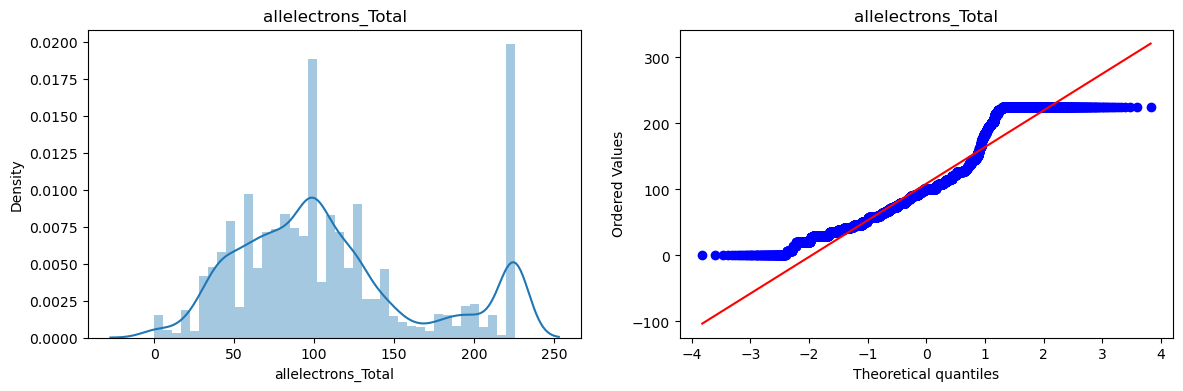

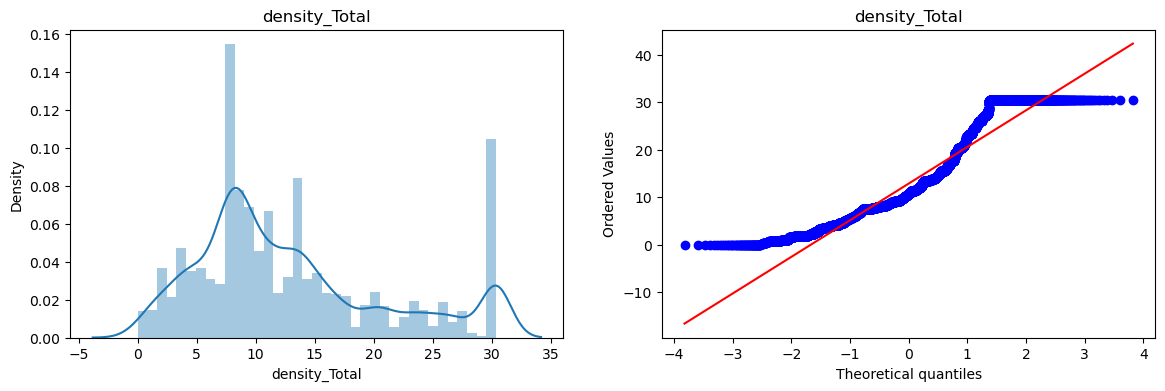

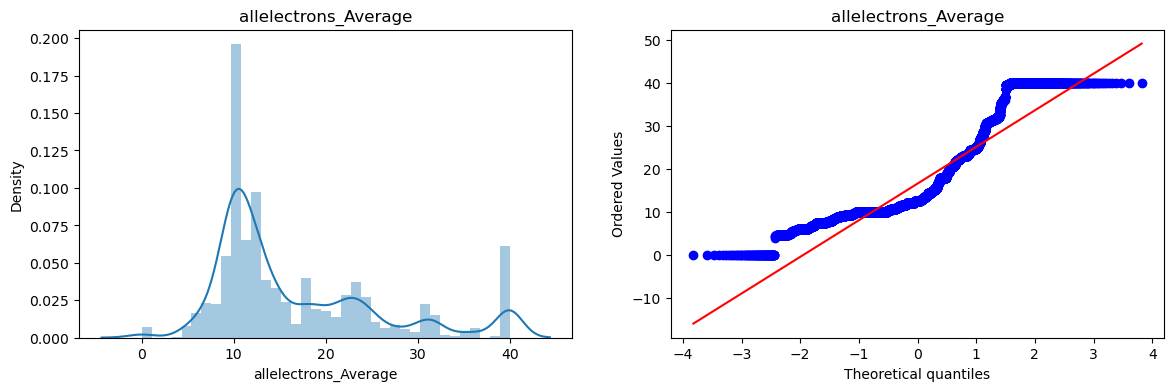

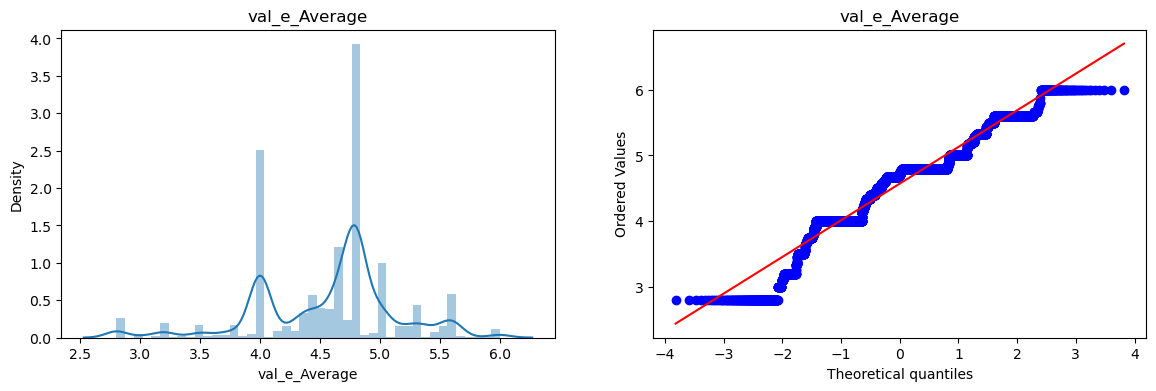

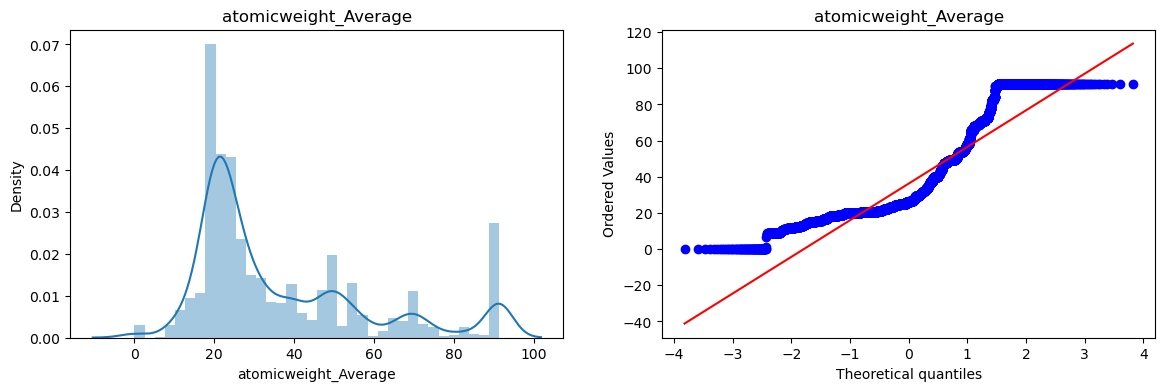

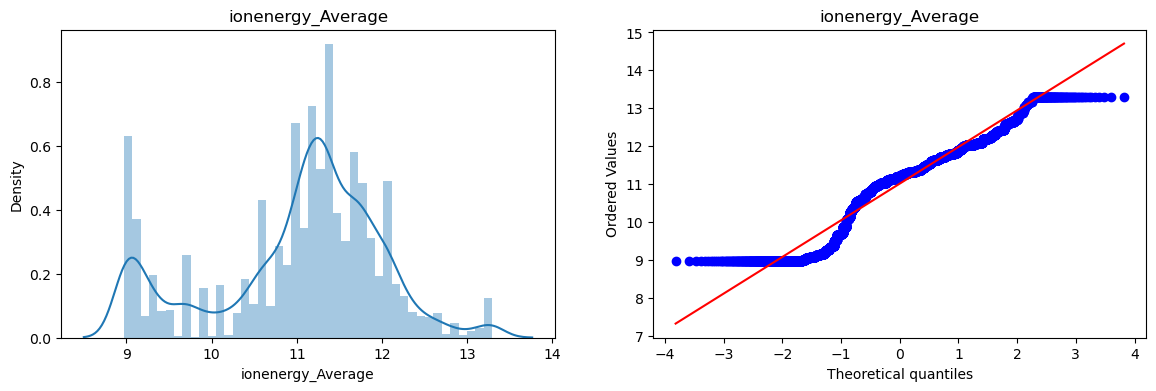

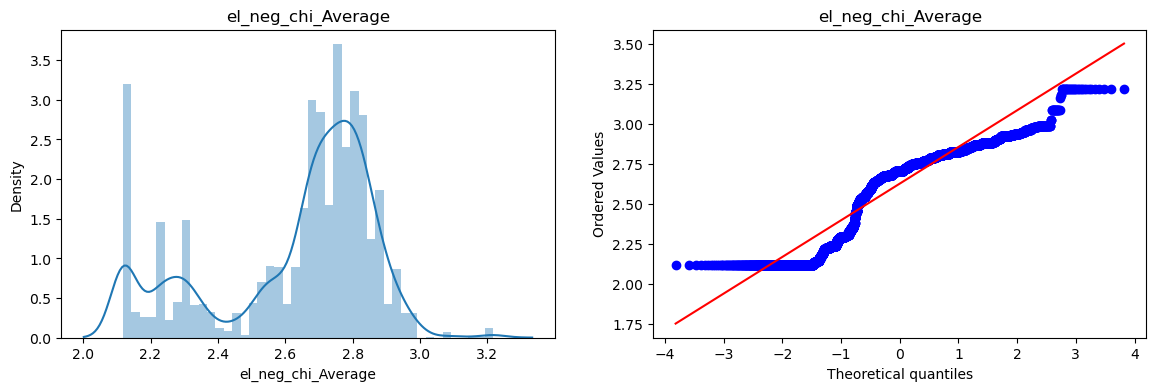

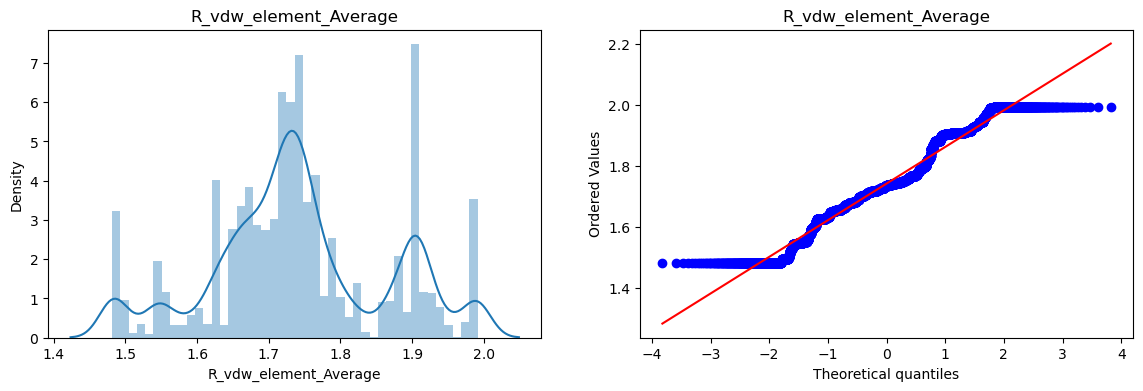

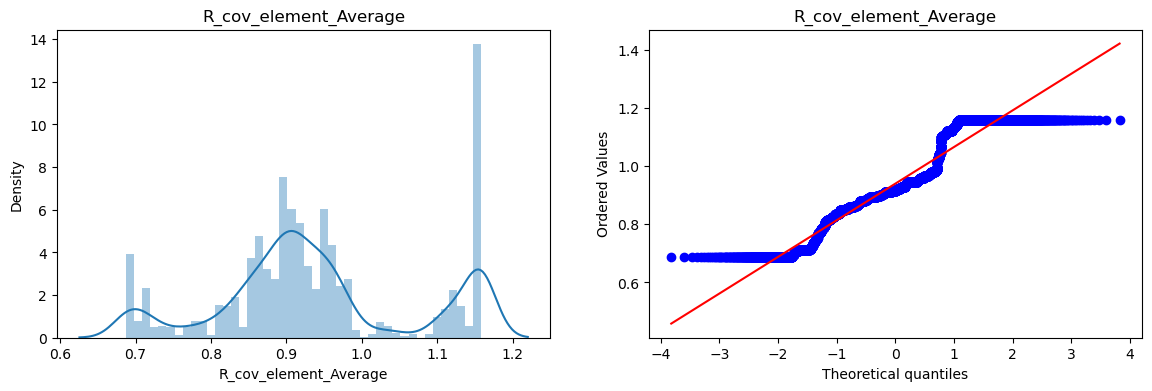

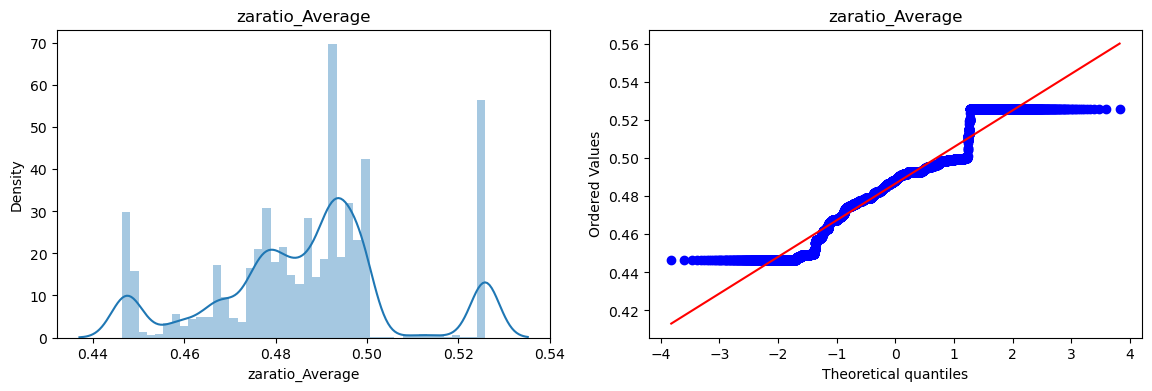

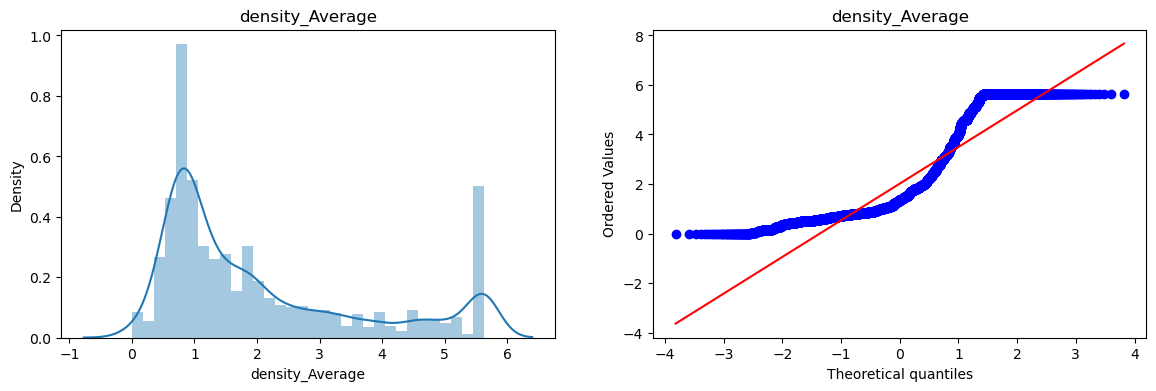

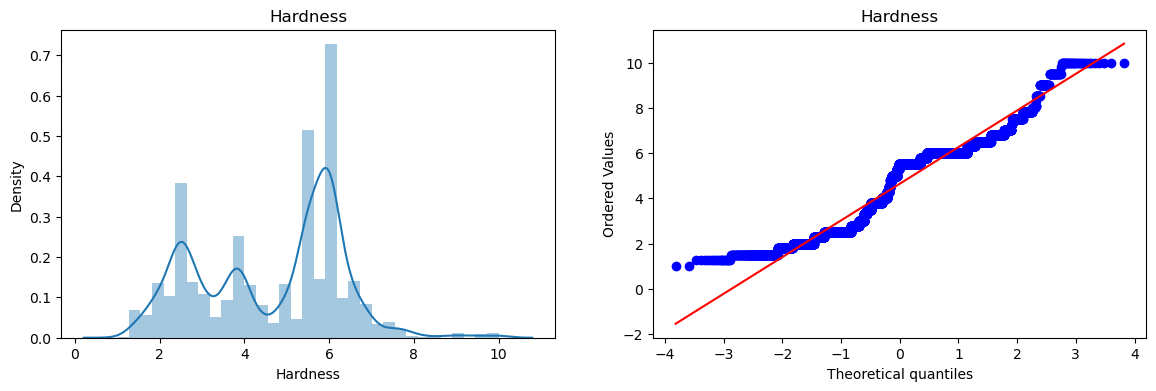

In [105]:
#Plotting the displot without transformation
import scipy.stats as stats
for col in train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(train[col],dist="norm",plot=plt)
    plt.title(col)
    
    plt.show()

In [106]:
#Applying Box-Cox Transformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='box-cox')

train_tranformed=pt.fit_transform(train+0.000001)
test_transformed=pt.fit_transform(test+0.000001)

pd.DataFrame({'cols':train.columns,'box-cox_lambdas':pt.lambdas_})

cols  box-cox_lambdas
0      allelectrons_Total         0.749397
1           density_Total         0.274641
2    allelectrons_Average         0.264521
3           val_e_Average         0.365035
4    atomicweight_Average         1.688486
5       ionenergy_Average         0.328905
6      el_neg_chi_Average         1.828391
7   R_vdw_element_Average         2.258365
8   R_cov_element_Average         2.019053
9         zaratio_Average         1.113296
10        density_Average         1.346089
11               Hardness         0.252342

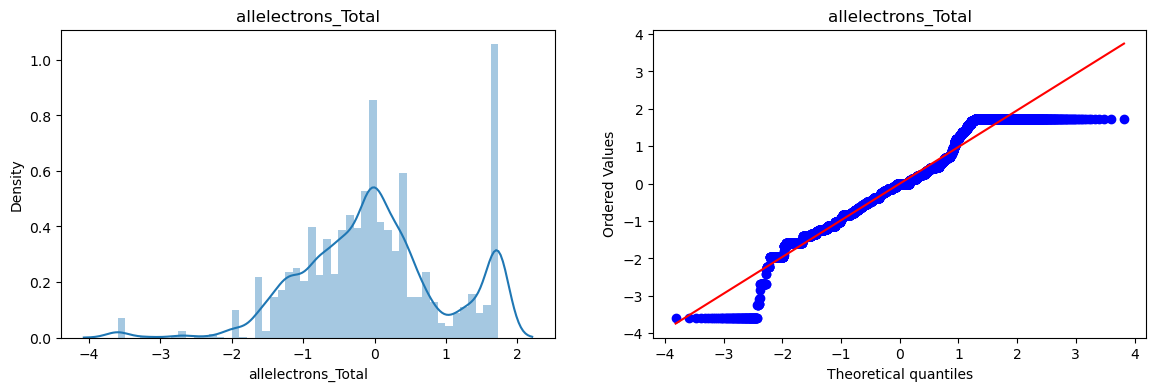

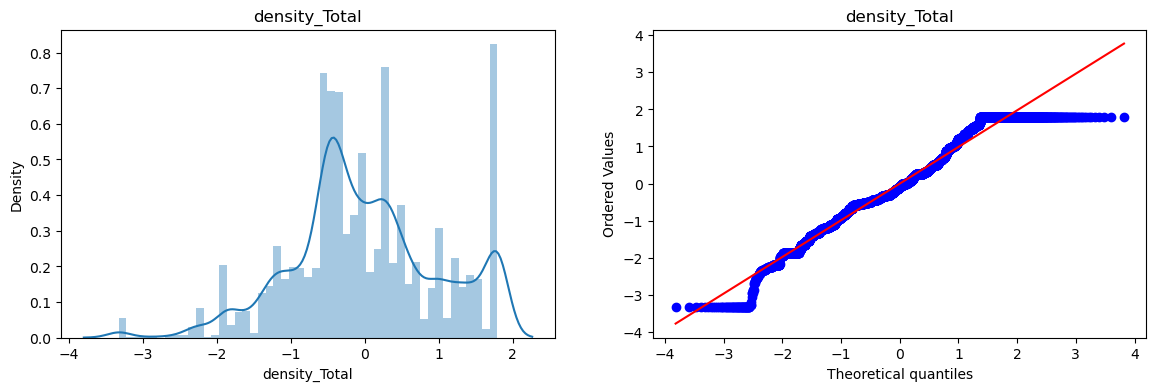

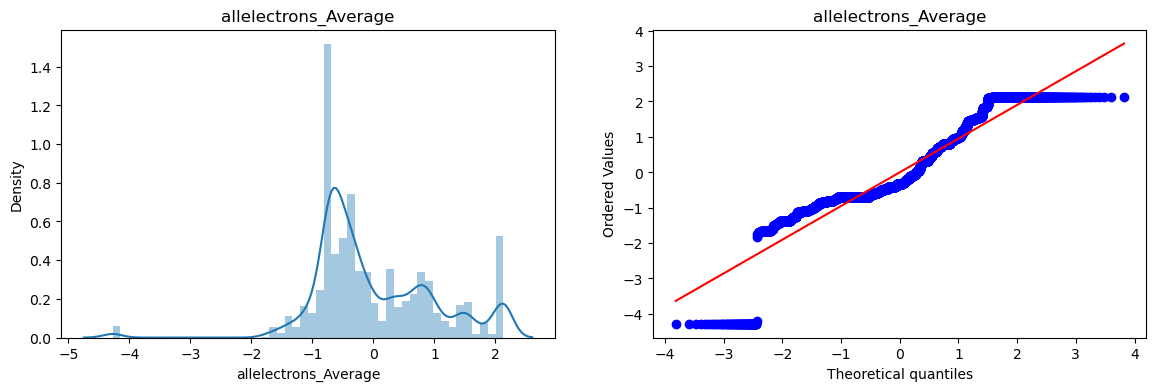

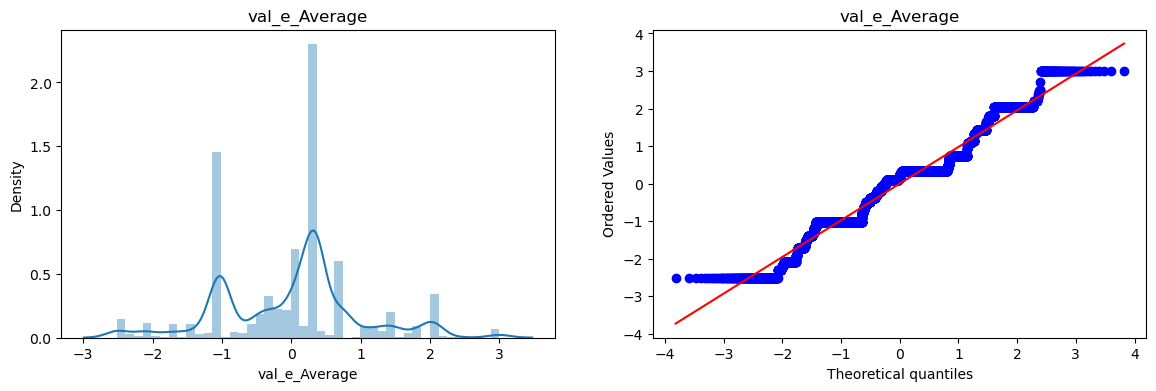

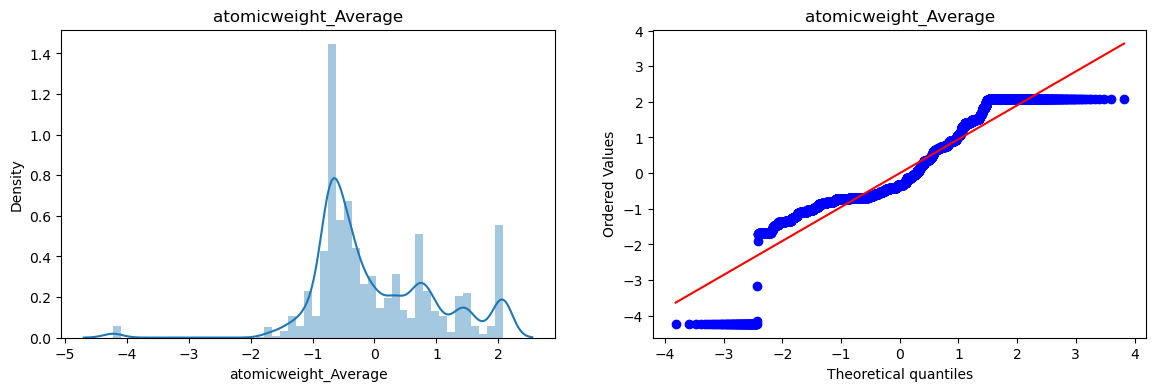

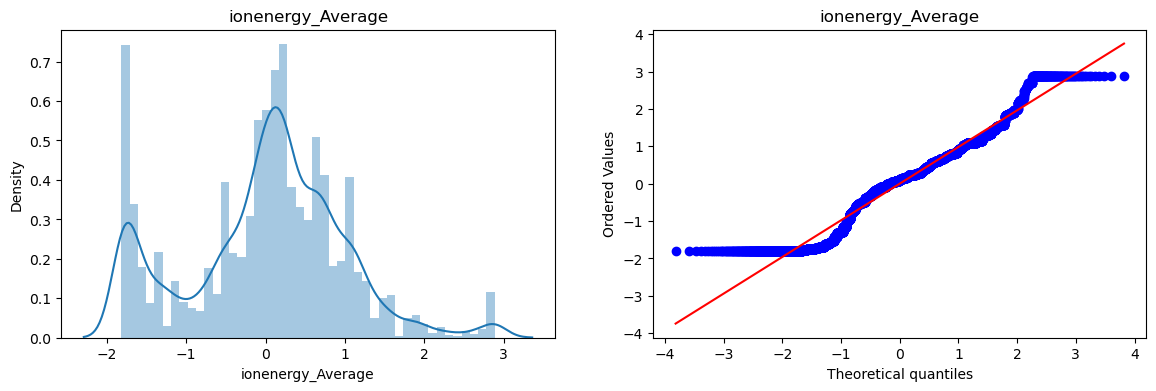

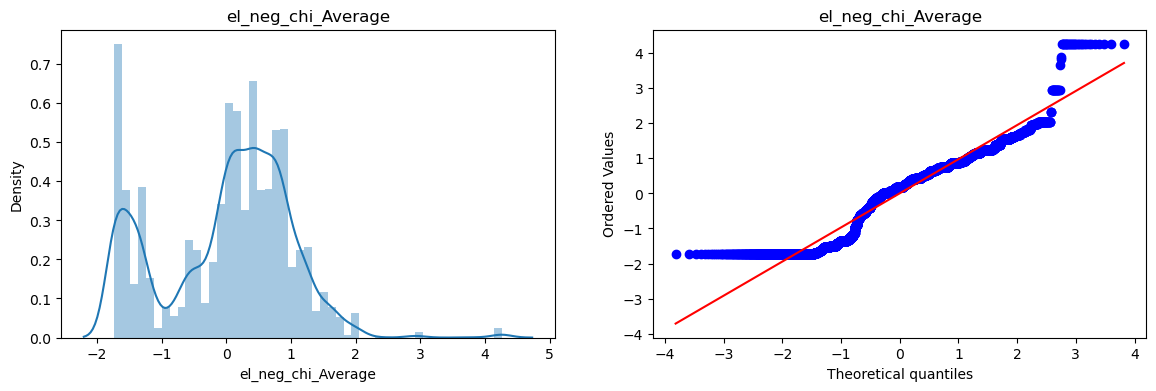

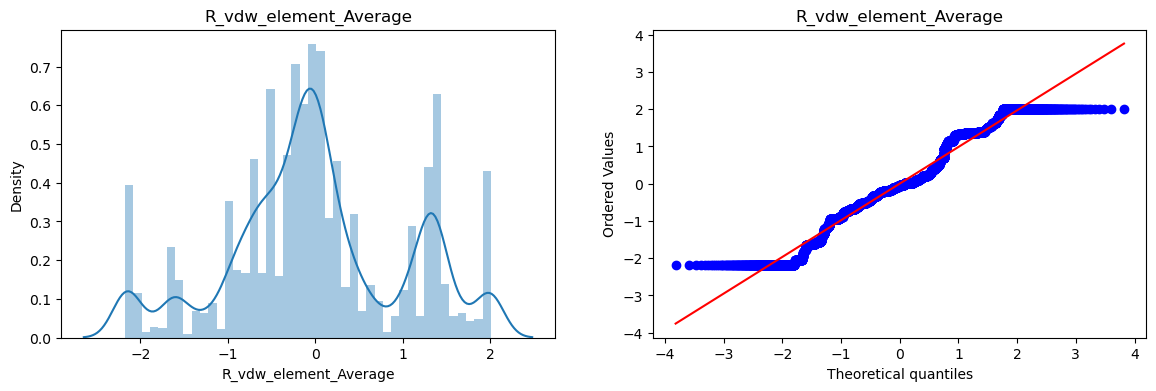

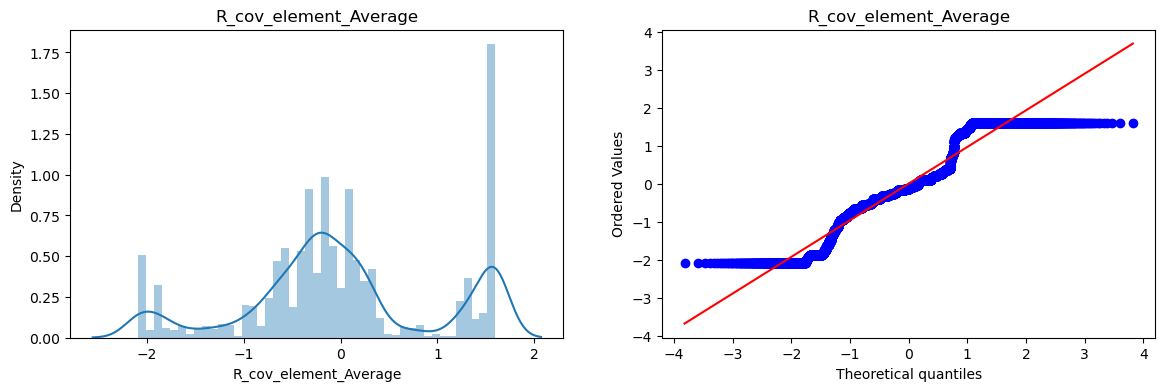

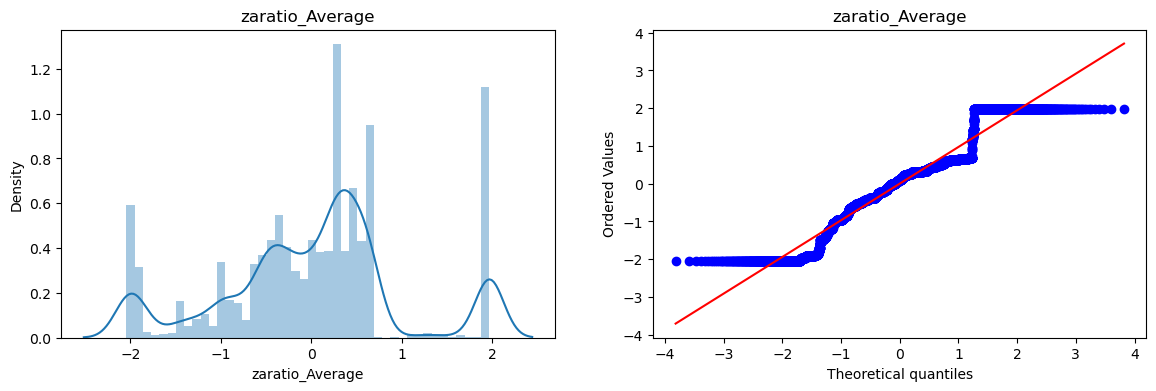

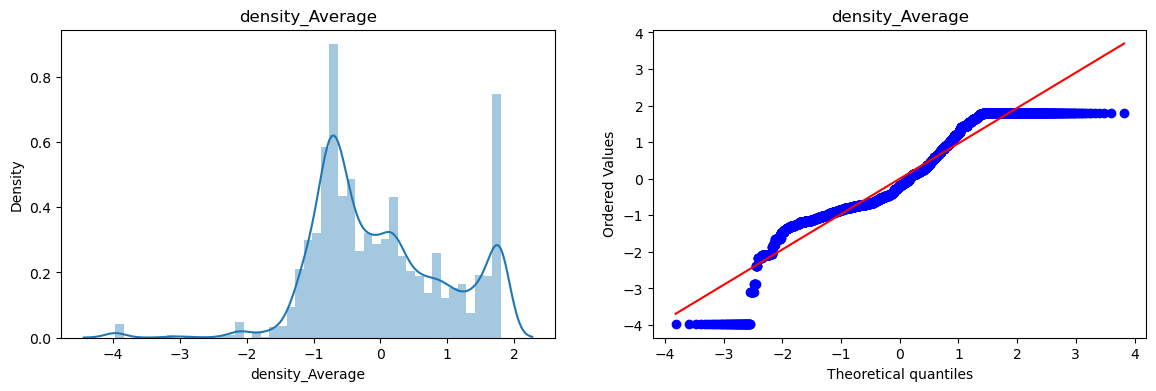

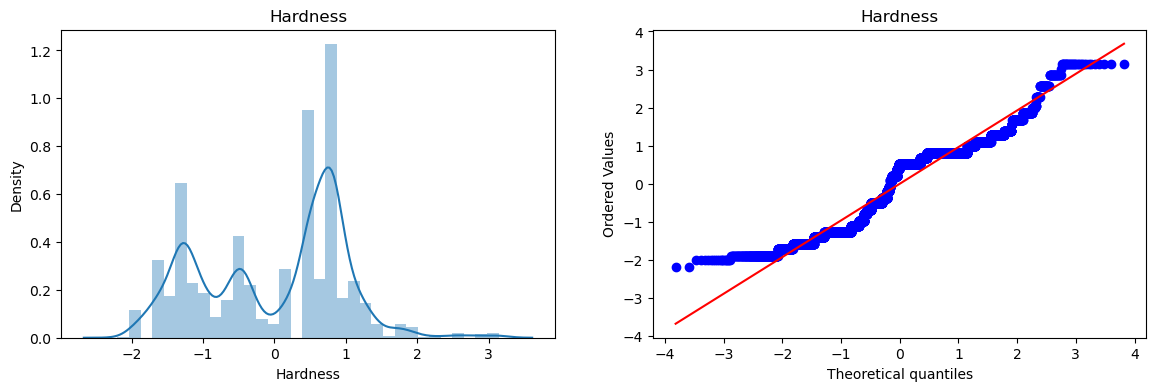

In [50]:
 # Plot after transformation
    
train_tranformed=pd.DataFrame(train_tranformed,columns=train.columns)
for col in train_tranformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(train_tranformed[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(train_tranformed[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()
    
    #plt.subplot(121)
    #sns.distplot(train[col])
    #plt.title(col)
    #plt.show()

In [52]:
import scipy

In [107]:
scipy.stats.skew(train_tranformed)

array([-0.12629537, -0.06945039,  0.15535521,  0.02761492,  0.15005738,
       -0.02786144, -0.13062211, -0.00324849, -0.00514256,  0.0012567 ,
        0.1021844 , -0.1458457 ])

In [62]:
#split_index=int(0.8*len(train_tranformed))

In [111]:
train_tranformed=pd.DataFrame(train_tranformed)

In [ ]:
X=train_tranformed.drop()

In [113]:
X.head()

id  allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
0   0               100.0       0.841611                  10.0            4.8   
1   1               100.0       7.558488                  10.0            4.8   
2   2                76.0       8.885992                  15.6            5.6   
3   3               100.0       8.795296                  10.0            4.8   
4   4               116.0       9.577996                  11.6            4.8   

   atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0             20.612526           11.08810               2.766   
1             20.298893           12.04083               2.755   
2             33.739258           12.08630               2.828   
3             20.213349           10.94850               2.648   
4             24.988133           11.82448               2.766   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                  1.732                  0.860         0.496070   
1                  1.631                  0.910         0.492719   
2                  1.788                  0.864         0.481478   
3                  1.626                  0.936         0.489272   
4                  1.682                  0.896         0.492736   

   density_Average  
0          0.91457  
1          0.71760  
2          1.50633  
3          0.78937  
4          1.86481

In [120]:
y.head()

0    6.0
1    6.5
2    2.5
3    6.0
4    6.0
Name: Hardness, dtype: float64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8325, 12)
(2082, 12)
(8325,)
(2082,)


Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
linear=LinearRegression()

In [126]:
linear.fit(X_train,y_train)

LinearRegression()

In [127]:
y_pred=linear.predict(X_test)

In [128]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAS",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAS 1.1720056367657072
MSE 2.105345997105267
R2 score 0.22542674761472803


#L1 & L2

In [129]:
from sklearn.linear_model import Ridge,LassoCV

In [137]:
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAS",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAS 1.1729357380158418
MSE 2.104828395380784
R2 score 0.2256171773358877


In [136]:
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAS",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAS 1.2268936277992342
MSE 2.1873591244599218
R2 score 0.19525347686458727


Random Regressor

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
randomreg=RandomForestRegressor()

In [135]:
randomreg.fit(X_train,y_train)
y_pred=randomreg.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAS",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAS 0.9277310278578289
MSE 1.5390257795389048
R2 score 0.4337803832713091


In [138]:
import pickle

In [139]:
filename='file.pkl'

In [ ]:
pickle.dump()